In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import pandas as pd

(1000, 3)


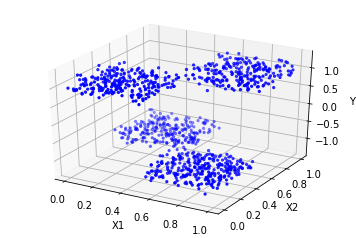

In [307]:
def feature( n ):
    X = np.random.uniform(low=0,high=1,size=(n,2))
    return X
def response1(X,sigma):
    U1 = 2*(X[:,0]< 0.5)-1
    V1 = 2*(X[:,1] < 0.5)-1
    noise = np.random.normal(0,sigma,len(X))
    Y = U1 * V1 + noise
    return Y

def response2(X, sigma):
    Y = X[:,0] * X[:,1] + np.random.normal(0,sigma,len(X))
    return Y

def response3(X, sigma):
    Y =  np.random.normal(0,sigma,len(X))
    return Y   
    

n = 10000
X = feature(n); Y = response1(X,0.1)
dataMat = np.empty([n,3]); dataMat[:,:-1] =  X; dataMat[:,-1] = Y 


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plotData(dataMat):
    X = dataMat[:1000,]; Y = dataMat[:1000,-1]
    print(X.shape)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X[:,0],X[:,1], Y, c = 'b', marker = '.')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    plt.show()
    
plotData(dataMat)


In [289]:
def bestSplitting(node,M_try,min_obs, n_obs):
    
    n = len(node)
    feat_id = 0; loc = 0; reduce = 0
    for i in M_try:
        sort_on_i = np.sort(X[:,i])
        for value in sort_on_i[min_obs: -min_obs]:
            right_node = node[node[:,i] > value]; left_node = node[node[:,i]<=value]
            n2 = len(right_node); n1 = len(left_node)
            if n1 > min_obs and n2 > min_obs:
                new_reduce = np.var(node[:,-1]) - 1.0 * n1 / n * np.var(left_node[:,-1]) - 1.0 * n2 / n * np.var(right_node[:,-1])
                if reduce < new_reduce:
                    reduce = new_reduce
                    feat_id = i; loc = value

    l_node = node[node[:,feat_id] <= loc]; n1 = len(l_node);l_mse = 1.0 * n1 / n_obs * np.var(l_node[:,-1])
    r_node = node[node[:,feat_id] > loc]; n2 = len(r_node); r_mse = 1.0 * n2 / n_obs * np.var(r_node[:,-1])
    
    return l_node, r_node, l_mse, r_mse,n1,n2,feat_id, loc

n_obs = len(dataMat)
min_obs = int(np.sqrt(n_obs))
# bestSplitting(dataMat,[0,1],min_obs,n_obs)

10000...

3663...6337...

6337...2923...740...

2923...740...2331...4006...

740...2331...4006...149...2774...

2331...4006...149...2774...154...586...

4006...149...2774...154...586...2172...159...

149...2774...154...586...2172...159...418...3588...

149...154...586...2172...159...418...3588...226...2548...

149...154...2172...159...418...3588...226...2548...451...135...

149...154...159...418...3588...226...2548...451...135...1842...330...

149...154...159...3588...226...2548...451...135...1842...330...281...137...

149...154...159...226...2548...451...135...1842...330...281...137...156...3432...

149...154...159...2548...451...135...1842...330...281...137...156...3432...104...122...

149...154...159...451...135...1842...330...281...137...156...3432...104...122...135...2413...

149...154...159...135...1842...330...281...137...156...3432...104...122...135...2413...325...126...

149...154...159...135...330...281...137...156...3432...104...122...135...2413...325...126...1333...509...



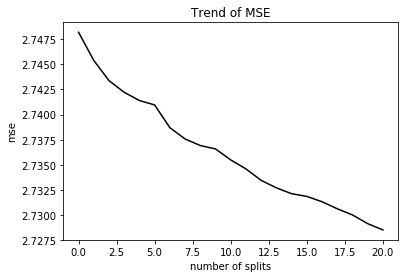

[1.0109371095805457, 1.0099181861251982, 1.0091858003687386, 1.008763194348467, 1.0084649749880432, 1.0083047888646062, 1.0074804195089953, 1.0070699255429103, 1.006831845705086, 1.0067085930015911, 1.0063094159108321, 1.0059832462632856, 1.0055655943944557, 1.0052944854904367, 1.0050815605620467, 1.0049836367415732, 1.0047894393638397, 1.004533595000493, 1.0043084855219009, 1.0039914902450431, 1.0037632759228763]


In [308]:


def consistTree(dataMat, max_leaf):
    n_obs = len(dataMat); min_obs = int(np.sqrt(n_obs))
    n_feat = dataMat[:,:-1].shape[1]
    mse = np.var(dataMat[:,-1]); 
    tree = {'root':{'Node': dataMat,'mse' : mse, 'n_obs': n_obs }}
    root = tree.copy()
    M = int(n_feat); M_try = np.random.choice(n_feat, M) # number of features to try
    
    treeTrack =[]; depth = 0
    new_tree = tree
    while(depth < max_leaf ):

        for  key  in list(tree):
            node_to_split = tree[key]['Node']
            
            if len(node_to_split) >= 2 * min_obs: # split if the current node has more than 2 min_obs
                l_data, r_data, l_mse, r_mse,n1,n2,feat_id, loc = bestSplitting(node_to_split, M_try, min_obs, n_obs)
                tree[key]['feat_id'] = feat_id
                tree[key]['loc'] = loc
            #   print(list(tree))
                treeTrack.append(tree.copy())
                
                del new_tree[key]
                new_tree[str(depth) + ': l_leaf'] = {'Node': l_data, 'mse': l_mse, 'n_obs': n1}
                new_tree[str(depth) + ': r_dleaf'] = {'Node': r_data, 'mse': r_mse, 'n_obs': n2}
        
                depth += 1 
                if depth > max_leaf: 
                    tree = new_tree; break
        tree = new_tree
    return treeTrack

def getEndTree( treeTrack ):
    end_tree = {} 
    for key in list(treeTrack[-1]):
        end_tree[key] ={
            'mse': treeTrack[-1][key]['mse'],
           #'feat_index': last_tree[key]['feat_index'],
           # 'location' : last_tree[key]['location'],
            'n_obs': treeTrack[-1][key]['n_obs']} 
    return end_tree

def getMSEPro( treeTrack):
    msePro = []
    for i in range(len(treeTrack)):
        mse = 0
        for key in list(treeTrack[i]):
            mse += treeTrack[i][key]['mse']
            print(treeTrack[i][key]['n_obs'], end = "...")
        print('\n')
        msePro.append(mse)
    
    fig, ax = plt.subplots()
    ax.plot(np.exp(msePro), 'k')
    ax.set(title='Trend of MSE', xlabel = 'number of splits',ylabel = 'mse')
    plt.show()
    
    return msePro

treeTrack = consistTree(dataMat,max_leaf = 20)
msePro = getMSEPro(treeTrack)
print(msePro)

    